In [1]:
# standard python utilities
import os
from os.path import basename
import sys
from importlib import reload
import glob
import pandas as pd
import numpy as np
import calendar
import time

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# standard geospatial python utilities
import pyproj # for converting proj4string
import shapely
import geopandas as gpd
# import rasterio

# mapping utilities
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.ticker import MaxNLocator

import flopy
import flopy.utils.binaryfile as bf


In [2]:
doc_dir = os.getcwd()
while os.path.basename(doc_dir) != 'Documents':
    doc_dir = os.path.dirname(doc_dir)
    
git_dir = os.getcwd()
while os.path.basename(git_dir) != 'GitHub':
    git_dir = os.path.dirname(git_dir)
usr_dir = os.getcwd()
while os.path.basename(usr_dir) != 'Users':
    temp = os.path.basename(usr_dir)
    usr_dir = os.path.dirname(usr_dir)
usr_dir += '/'+temp

py_dir = git_dir +'/CosumnesRiverRecharge/python_utilities/'
## Set up directory referencing
# Package data
gwfm_dir = usr_dir+'/Box/research_cosumnes/GWFlowModel/'
gwfm_dir
bas_dir = gwfm_dir + 'BAS6/'
proj_dir = gwfm_dir+'Levee_setback/'
plt_dir = proj_dir+'figures/'


## Pick model type to review
RIV is the simple model with only SS assumptions about Blodgett Dam depth and area
LAK is the complex model with interactive flow between the stream and Blodgett Dam

In [3]:
# run_dir = 'C://WRDAPP/GWFlowModel'
run_dir = 'F://WRDAPP/GWFlowModel'
loadpth = run_dir +'/Cosumnes/levee_setback/streamflow/'

# runs = os.listdir(loadpth)
# runs
runs = ['setback_streamflow','historical_streamflow']


In [4]:
# model_ws =loadpth+'/actual_200cfs'

# i=0
# os.listdir(loadpth+runs[i])
# glob.glob(loadpth+runs[i]+'/*.nam')[0]
# model_ws = loadpth+runs[i]

# model_nam = 'setback_streamflow'
model_nam = 'historical_streamflow'


model_ws = loadpth+model_nam


In [5]:

m = flopy.modflow.Modflow.load('MF.nam', model_ws= model_ws, 
                                exe_name='mf-owhm', version='mfnwt')

# m_ss = flopy.modflow.Modflow.load('MF.nam', model_ws= loadpth+'historical_SS', 
#                                 exe_name='mf2005', version='mfnwt')

In [6]:
sfr_dir = gwfm_dir+'/SFR_data/'
grid_sfr = gpd.read_file(sfr_dir+'/final_grid_sfr/grid_sfr.shp')
grid_sfr['Kz'] = m.sfr.reach_data.strhc1
m_domain = gpd.read_file(gwfm_dir+'/DIS_data/NewModelDomain/GWModelDomain_52_9deg_UTM10N_WGS84.shp')
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')
grid_p['easting'] = grid_p.geometry.centroid.x
grid_p['northing'] = grid_p.geometry.centroid.y

lak_grid_clip = gpd.read_file(proj_dir+'lak_grid_clip/lak_grid_clip.shp')


C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError

In [7]:
map_fxn_dir = doc_dir+'/GitHub/CosumnesRiverRecharge/python_utilities'
if map_fxn_dir not in sys.path:
    sys.path.append(map_fxn_dir)
# sys.path
from map_obs_plt import plt_bc_hk, plot_head_simple, plot_dtw_simple
from map_cln import gdf_2_lims

# from importlib import reload
# # importlib.reload
# reload(tc)

In [8]:
# def plt_bc_hk(model, ax, hk=False):
#     mapview = flopy.plot.PlotMapView(model=model,ax=ax)

#     # plot the horizontal hydraulic conductivities
#     if hk == True:
#         a = model.lpf.hk.array
#         csa = mapview.plot_array(a, norm=mpl.colors.LogNorm())
#         cb = plt.colorbar(csa, shrink=0.75,ax=ax)
#         cb.set_label('Horiz. Cond. (m/d)')
#     # Plots boundary condtiions
# #     quadmesh = mapview.plot_ibound(ax=ax)
#     mapview.plot_bc("GHB", plotAll=True,ax=ax)
#     mapview.plot_bc("SFR", plotAll=True,ax=ax)
#     mapview.plot_bc("CHD", plotAll=True,ax=ax)
#     mapview.plot_bc("WEL", plotAll=True,ax=ax,alpha=0.1, color='red')

#     ax.ticklabel_format(style='plain')
# #     linecollection = mapview.plot_grid(linewidths = 0.3,ax=ax)
#     ax.set_xlabel('Easting (m)')
#     ax.set_ylabel('Northing (m)')

In [9]:
# def gdf_2_lims(gdf,ax):
#     xmin, ymin = gdf.geometry.bounds.loc[:,['minx','miny']].min()
#     xmax, ymax = gdf.geometry.bounds.loc[:,['maxx','maxy']].max()
#     ax.set_xlim(xmin,xmax)
#     ax.set_ylim(ymin,ymax)

In [10]:
# def plot_head_simple(model, hdobj, cbb, spd_stp,time, name, ax,units):
#     hd_step = 5
#     if units =='ft':
#         fact = 0.3048
#     elif units== 'm':
#         fact=1
#     head = hdobj.get_data(kstpkper = spd_stp)/fact
#     levels_hmax = np.round(np.max(head[head!=1E+30/fact]),-1)
#     levels_hmin = np.round(np.min(head[head>=-200/fact]),-1)
#     levels = np.arange(levels_hmin, levels_hmax, int(hd_step/fact))

#     ax.set_title(name+' Head Contours at '+ str(time))
#     mapview = flopy.plot.PlotMapView(model=model,ax=ax)

#     contour_set = mapview.contour_array(head, masked_values=[-999.99], levels=levels, ax=ax)
#     hcb = plt.colorbar(contour_set, shrink = 0.5,ax=ax)
#     hcb.set_label('Head ('+units+')')
#     ax.clabel(contour_set, contour_set.levels[0::2], inline=True, fontsize=8)

# #     quiver = mapview.plot_discharge(frf, fff, istep=10, jstep=10)  # no head array for volumetric discharge
#     ax.ticklabel_format(style='plain')
# #     linecollection = mapview.plot_grid(linewidths = 0.3,ax=ax)
#     ax.set_xlabel('Easting (m)')
#     ax.set_ylabel('Northing (m)')
# #     fig.tight_layout()

In [11]:
# def plot_dtw_simple(model, hdobj, cbb, spd_stp,time, name, ax,units):
#     hd_step = 10
#     if units =='ft':
#         fact = 0.3048
#     elif units== 'm':
#         fact=1
#     head = hdobj.get_data(kstpkper = spd_stp)/fact
#     dtw = model.dis.top.array-head
#     levels_dtw_max = np.round(np.max(dtw[head!=1E+30/fact]),-1)
#     # filter out dtw greater than 300 because of mountain ranges
# #     levels_dtw_max = 300
#     levels_dtw_hmin = np.round(np.min(dtw[head>=-200/fact]),-1)
# #     levels_dtw_hmin = -300
#         #     frf = cbb.get_data(text='FLOW RIGHT FACE')[0]
#     #     fff = cbb.get_data(text='FLOW FRONT FACE')[0]

#     levels = np.arange(levels_dtw_hmin, levels_dtw_max, int(hd_step/fact))

#     ax.set_title(name+' DTW Contours at '+ str(time))
#     mapview = flopy.plot.PlotMapView(model=model,ax=ax)
    
#     contour_set = mapview.contour_array(dtw, masked_values=[-999.99], levels=levels, ax=ax)
#     hcb = plt.colorbar(contour_set, shrink = 0.5,ax=ax)
#     hcb.set_label('DTW ('+units+')')
#     ax.clabel(contour_set, contour_set.levels[0::2], inline=True, fontsize=8)
# #     ax.clabel(contour_set, contour_set.levels[0::2], inline=True, fontsize=8)

# #     quiver = mapview.plot_discharge(frf, fff, istep=10, jstep=10)  # no head array for volumetric discharge
#     ax.ticklabel_format(style='plain')
# #     linecollection = mapview.plot_grid(linewidths = 0.3,ax=ax)
#     ax.set_xlabel('Easting (m)')
#     ax.set_ylabel('Northing (m)')


# Head plots and contours

In [12]:
hdobj = flopy.utils.HeadFile(model_ws+'/MF.hds')
spd_stp = hdobj.get_kstpkper()
times = hdobj.get_times()
cbc = model_ws+'/MF.cbc'

strt_date = pd.to_datetime(m.dis.start_datetime)
dates = strt_date+(np.asarray(times)-1).astype('timedelta64[D]')

dt_ref = pd.DataFrame(dates, columns=['dt'])
dt_ref['kstpkper'] = spd_stp


In [17]:
dt_ref.shape, m.rch.rech.array.shape, m.dis.nper, len(times)

((238, 2), (1462, 1, 100, 230), 1462, 238)

In [15]:
rech = m.rch.rech.array[:,0,:,:]
rech_avg = pd.Series(rech.mean(axis=(1,2)))[1:]
# rech_avg.index=dt_ref.dt[:-1]



In [30]:
storativity = np.array(pd.read_csv(model_ws+'/input_data/storativity.tsv', delimiter=' ',header=None))
storativity = np.reshape(storativity, (m.dis.nlay, m.dis.nrow, m.dis.ncol))


In [13]:
hdobj_ss = flopy.utils.HeadFile(loadpth+'historical_SS/MF.hds')
# hdobj_ss = flopy.utils.HeadFile(loadpth+'historical_streamflow/MF.hds')
# temp = hdobj_ss.get_data((0,0))
# plt.imshow(temp[0,:,:])
# plt.colorbar()

In [14]:
# shapefile rectangle of the area surrounding the Dam within about 5 cells
zon_dam_gpd = gpd.read_file(gwfm_dir+'/Blodgett_Dam/geospatial/zon_bud_extent/zon_bud_extent.shp')

zon_cells = gpd.sjoin(grid_p,zon_dam_gpd,how='right',op='within')
# zon_cells = gpd.sjoin(grid_p,zon_dam_gpd) #includes more cells, including with high conductance

# filter zone budget for Blodgett Dam to just within 5 cells or so of the Dam
# zon_dam = np.zeros((m.dis.nrow,m.dis.ncol),dtype=int)
zon_dam = np.zeros((grid_p.row.max(),grid_p.column.max()),dtype=int)

zon_dam[zon_cells.row-1,zon_cells.column-1]=1

zon_mod = np.ones((grid_p.row.max(),grid_p.column.max()),dtype=int)

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError

In [16]:
# this doesn't seem to have helped much
# dir_current = 'historical_streamflow'
# dir_2010 = 'historical_SS'
# head_current = np.zeros(m.dis.botm.shape)
# head_2010 = np.zeros(m.dis.botm.shape)

# for k in np.arange(0,m.dis.nlay):
#     head_current[k,:,:] = np.loadtxt(bas_dir+'steadystate_heads/'+dir_current+'/layer'+str(k)+'.tsv',delimiter='\t')
#     head_2010[k,:,:] = np.loadtxt(bas_dir+'steadystate_heads/'+dir_2010+'/layer'+str(k)+'.tsv',delimiter='\t')

In [17]:
# plt.imshow((head_current-head_2010)[0,:,:], vmin=-100)
# plt.colorbar()

In [18]:
# save steady state head to try to improve ss run time
# head_ss = hdobj_ss.get_data((0,0))
# os.makedirs(bas_dir+'steadystate_heads/'+basename(model_ws), exist_ok=True)
# for k in np.arange(0,head_ss.shape[0]):
#     np.savetxt(bas_dir+'steadystate_heads/'+basename(model_ws)+'/layer'+str(k)+'.tsv', head_ss[k,:,:],delimiter='\t')

# Sim vs Obs Head


In [40]:
# model_ws = loadpth+'historical_SS'
# model_ws = loadpth+'historical_streamflow'

In [73]:
hobout = pd.read_csv(model_ws+'/MF.hob.out',delimiter=r'\s+', header = 0,names = ['sim_val','WSE','obs_nam'],
                     dtype = {'sim_val':float,'obs_val':float,'obs_nam':object},
                    na_values=[-9999.])
# if only one obs exists correct naming convention
one_obs = ~hobout.obs_nam.str.contains('.0')
hobout.loc[one_obs,'obs_nam'] = hobout.loc[one_obs,'obs_nam']+'.'+str(1).zfill(5)

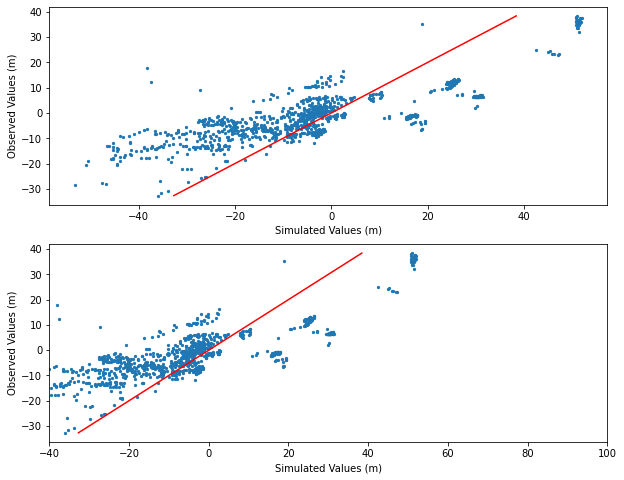

In [74]:
fig, ax = plt.subplots(2,1,figsize=(10,8))

# get boundary values for plotting a 1:1
hobmax = hobout.loc[:,['sim_val','WSE']].max().min()
hobmin = hobout.loc[:,['sim_val','WSE']].min().max()

# plot observed vs simulated values
hobout.plot.scatter(x='sim_val',y='WSE',marker='.',ax=ax[0])
ax[0].plot([hobmin,hobmax],[hobmin,hobmax],'red')
ax[0].set_ylabel('Observed Values (m)')
ax[0].set_xlabel('Simulated Values (m)')

hobout.plot.scatter(x='sim_val',y='WSE',marker='.',ax=ax[1])
ax[1].set_xlim(-40,100)

# plot 1:1 line
ax[1].plot([hobmin,hobmax],[hobmin,hobmax],'red')

plt.ylabel('Observed Values (m)')
plt.xlabel('Simulated Values (m)')

fig_nam = plt_dir+'GSP_WaterBudget/sim_vs_obs_heads'

# plt.savefig(fig_nam+'.png',dpi=600,bbox_inches='tight')
# plt.savefig(fig_nam+'.svg',dpi=600,bbox_inches='tight')

In [24]:
def mak_hob_gpd(hobout):
    all_obs = pd.read_csv(model_ws+'/input_data/all_obs_grid_prepared.csv',index_col=0)
    all_obs.index = all_obs.index.rename('MSMT_DATE')
    all_obs = all_obs.reset_index()
    # join more indepth obs data to output simulated heads
    obs_data = hobout.join(all_obs.set_index('obs_nam'),on=['obs_nam'])
    obs_data = obs_data.dropna(subset=['node'])
    obs_data.loc[:,['row','column','node']] = obs_data.loc[:,['row','column','node']].astype(int)

    # obs_data.index = obs_data.index
    obs_grid = obs_data.join(grid_p.set_index(['row','column']).loc[:,['easting','northing']], 
                             on=['row','column'])
    # # convert back to geospatial
    hob_gpd = gpd.GeoDataFrame(obs_grid, geometry = gpd.points_from_xy(obs_grid.easting, obs_grid.northing))
    hob_gpd['error'] = hob_gpd.WSE - hob_gpd.sim_val
    hob_gpd['abs_error'] = hob_gpd.error.abs()
    
    if 'MSMT_DATE' in hob_gpd.columns:
        hob_gpd = hob_gpd.set_index('MSMT_DATE')
        hob_gpd.index = pd.to_datetime(hob_gpd.index)    
        #     groupby values by season
        hob_gpd.loc[(hob_gpd.index.month > 2)&(hob_gpd.index.month < 6),'season'] = 'spring'
        hob_gpd.loc[(hob_gpd.index.month > 8)&(hob_gpd.index.month < 12),'season'] = 'fall'
    
    return(hob_gpd)
    # set date
    


In [54]:
hob_gpd = mak_hob_gpd(hobout)

hob_seasonal = hob_gpd.groupby(['node','season']).mean()
hob_seasonal = gpd.GeoDataFrame(hob_seasonal, geometry = gpd.points_from_xy(hob_seasonal.easting, hob_seasonal.northing))
hob_seasonal = hob_seasonal.reset_index()
    


In [55]:
hob_gpd['Statistic'] = 0.01
hob_gpd['StatFlag'] = 'SD'
# locations with significant difference between RPE GSE and the DEM should have additional uncertainty included
hob_gpd['Statistic'] += np.round(np.abs(hob_gpd.dem_wlm_gse),4)
hob_gpd['Weight'] = 1/(hob_gpd.Statistic**2)

soswr = (np.sum(np.abs(hob_gpd.sim_val-hob_gpd.WSE)*hob_gpd.Weight))
print('Sum of absolute difference of OBS and SIM: %.2e' %soswr)

Sum of absolute difference of OBS and SIM: 2.82e+05


In [47]:
# print('Upper Cosumnes - deep DTW expected')

# hob_interest = hob_gpd.loc[hob_gpd.node.isin([14644, 15343, 16963])]
# print('Simulated DTW (ft): ',(hob_interest.dem_elev - hob_interest.sim_val).values/0.3048)
# print('Observed DTW (ft): ',(hob_interest.dem_elev - hob_interest.WSE).values/0.3048)

# # hob_interest
# print('Lower Cosumnes - shallow DTW expected')
# hob_interest = hob_gpd.loc[hob_gpd.node.isin([9448, 6458, 17487])]
# print('Simulated DTW (ft): ',(hob_interest.dem_elev - hob_interest.sim_val).values/0.3048)
# print('Observed DTW (ft): ',(hob_interest.dem_elev - hob_interest.WSE).values/0.3048)

# hob_interest

The error is slightly smaller than presented because I used the raw GWE which is based on the surveyed land surface elevation instead of the adjusted water surface elevation based on the model top elevation. Additionally these three wells are in a part of the basin with grassland/pasture that I was not simulating for pumping because it was such a large portion of the domain and it is difficult to know whether it is irrigated or not. It may need to be adjusted to allow pumping on pasture when it is near a domestic or agricultural well (say a radius of 1000 ft or 300 m). South of the Cosumnes water levels tend to be even lower than on the north side where perhaps Deer Creek provides more recharge.

In [48]:
# convert pumping to array
pump = np.zeros((m.dis.nper,m.dis.nrow,m.dis.ncol))
for n in np.arange(0,m.dis.nper):
    wel_n = m.wel.stress_period_data[n]
    pump[n, wel_n.i, wel_n.j] += wel_n.flux*-1
pump_rate = pump/(m.dis.delr[0]*m.dis.delc[0])

Exception: get_data() error: kstpkper not found:(0, 365)

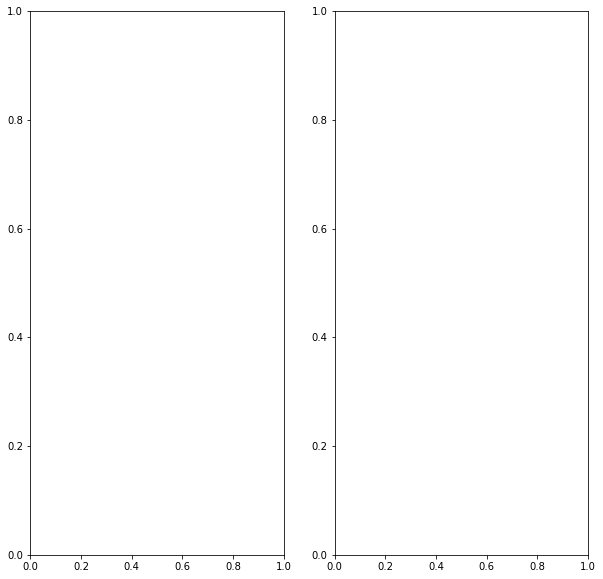

In [49]:
import contextily as ctx

def background_plt(ax, arr):
    ''' Plot Array data over background map data'''
    mapview = flopy.plot.PlotMapView(model=m,ax=ax)

    csa = mapview.plot_array(arr, ax=ax, alpha = 0.6) #norm=mpl.colors.LogNorm(),
    cb = plt.colorbar(csa, shrink=0.3,ax=ax)
    
    # hob_gpd[hob_gpd.node.isin(nodes2chk)].plot('node', ax=ax, legend=True)
    hob_gpd[hob_gpd.node.isin(nodes2chk)].plot('SITE_CODE', ax=ax, legend=False, legend_kwds={'loc':(1.2,0.4)})

    grid_sfr.plot('Kz', ax=ax,legend=False, 
                  norm=mpl.colors.LogNorm(vmin=grid_sfr.Kz.min(), vmax=grid_sfr.Kz.max()),
                  legend_kwds={'shrink':0.8})
    ctx.add_basemap(ax=ax, crs='epsg:32610', alpha = 0.6,
                    source = ctx.providers.Esri.WorldImagery, attribution=False)
    return(mapview)

# nodes2chk = [11084, 10383,10161,9290,8437,6564,14626,15314,6085,13407,10384,16614,20285]
nodes2chk = [11218,8437,16963,9580,5056,15343,14626,15314] # nodes with obs avg well below simulated
# nodes2chk = [9290,22825, 11218] # nodes without overly large 2017 fluctuations

fig,ax0=plt.subplots(1,2, figsize=(10,10))

ax = ax0[0]
mapview = background_plt(ax=ax0[0], arr = (hdobj.get_data((0,365)).mean(axis=0) - h_ss))

ax = ax0[1]
mapview = background_plt(ax=ax0[1], arr = m.rch.rech.array[1:365,0,:,:].mean(axis=0))


fig.tight_layout()

<AxesSubplot:>

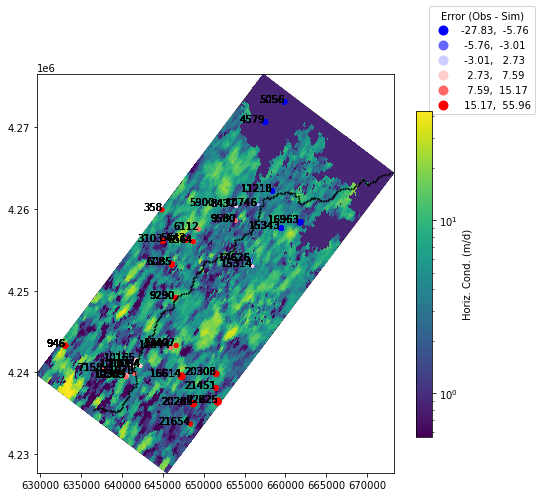

In [79]:
fig,ax=plt.subplots(figsize=(8, 8))
# m = m_ss
m_domain.plot(ax=ax,color='None')
mapview = flopy.plot.PlotMapView(model=m,ax=ax)
a = m.lpf.hk.array

csa = mapview.plot_array(a[0,:,:], norm=mpl.colors.LogNorm())
cb = plt.colorbar(csa, shrink=0.75,ax=ax)
cb.set_label('Horiz. Cond. (m/d)')

# hob_gpd.plot('error',scheme='EqualInterval', k= 6, ax=ax,legend=True,cmap='magma')
hob_gpd.plot('error',markersize='abs_error',scheme='Quantiles', k = 6, ax=ax,
                  legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.9),'title':'Error (Obs - Sim)'})
# hob_gpd.apply(lambda x: ax.annotate(str(x.node), xy=x.geometry.centroid.coords[0], ha='right'),axis=1);
hob_gpd.apply(lambda x: ax.annotate(str(x.node), xy=list(x.geometry.coords)[0], ha='right'),axis=1);

grid_sfr.plot(ax=ax,color='black')
# ax.legend(loc=(1,0.5))

In [51]:
nodes2chk = [202825, 12944, 6085, 14626, 6564, 9580, 8437, 21451, 10384, 13407, 946] # not enough fluctuations

# nodes2chk = [22825, 12944, 6085, 14626, 6564, 9580, 8437] # not enough fluctuations
# nodes2chk = [10165, 9290, 10161, 11084, 11078, 10383] # fluctuate well, near river, shallow (6 from CRP)
chk = hob_gpd[hob_gpd.node.isin(nodes2chk)]
chk.layer.unique()
# chk.dem_elev.unique()

# chk.SITE_CODE.unique()

array([12, 19, 13,  8,  7,  5,  4, 20], dtype=int64)

In [52]:
ss_chk = m.lpf.ss.array[chk.layer.astype(int), chk.row.astype(int), chk.column.astype(int)]
hk_chk = m.lpf.hk.array[chk.layer.astype(int), chk.row.astype(int), chk.column.astype(int)]
# hk_chk

In [72]:
hob_gpd[hob_gpd.node.isin(nodes2chk)].columns
hob_gpd[hob_gpd.node.isin(nodes2chk)].groupby('SITE_CODE').mean()

sim_val        WSE        GWE    WLM_GSE    node   row  \
SITE_CODE                                                                      
385707N1211868W001  57.952698  23.757857  23.757854  79.266288  4579.0  19.0   
385923N1211621W001  73.437853  36.029672  36.029672  95.243904  5056.0  21.0   

                    column  WELL_DEPTH   dem_elev  dem_wlm_gse  wse_m_adj  \
SITE_CODE                                                                   
385707N1211868W001   208.0     205.740  77.467146    -1.799142  21.958712   
385923N1211621W001   225.0      86.868  95.789247     0.545343  36.575016   

                           spd  layer        easting      northing      error  \
SITE_CODE                                                                       
385707N1211868W001  562.285714   20.0  657532.513327  4.270632e+06 -34.194841   
385923N1211621W001  592.344828    0.0  659902.454177  4.273103e+06 -37.408181   

                    abs_error  Statistic    Weight  
SITE_CODE                                           
385707N1211868W001  34.194841     1.8091  0.305545  
385923N1211621W001  37.408181     0.5553  3.242983

<AxesSubplot:xlabel='MSMT_DATE', ylabel='sim_val'>

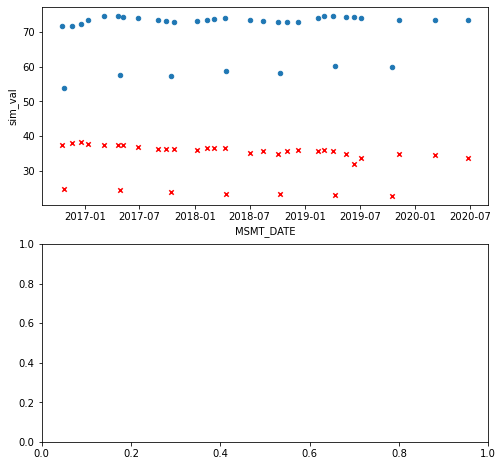

In [70]:
fig,ax = plt.subplots(2,1,figsize=(8,8))
# nodes2chk = [10165, 9290, 10161, 11084, 11078, 10383] # fluctuate well, near river, shallow (6 from CRP)
nodes2chk = [4579, 5056] # fluctuate well, near river, shallow (6 from CRP)

hob_gpd[hob_gpd.node.isin(nodes2chk)].reset_index().plot(x='MSMT_DATE',y='WSE',kind='scatter', ax=ax[0], 
                                                         marker='x', color='red')
hob_gpd[hob_gpd.node.isin(nodes2chk)].reset_index().plot(x='MSMT_DATE',y='sim_val',kind='scatter', ax=ax[0], marker='o')

# rech_avg.resample('M').sum().plot(ax=ax[1], sharex=ax[0])


In [82]:
hdobj = flopy.utils.HeadFile(model_ws+'/MF.hds')
spd_stp = hdobj.get_kstpkper()
times = hdobj.get_times()
cbc = model_ws+'/MF.cbc'

hobout = pd.read_csv(model_ws+'/MF.hob.out',delimiter=r'\s+', header = 0,names = ['sim_val','WSE','obs_nam'],
                     dtype = {'sim_val':float,'obs_val':float,'obs_nam':object},
                    na_values=[-9999.])
# if only one obs exists correct naming convention
one_obs = ~hobout.obs_nam.str.contains('.0')
hobout.loc[one_obs,'obs_nam'] = hobout.loc[one_obs,'obs_nam']+'.'+str(1).zfill(5)

hob_gpd = mak_hob_gpd(hobout)

# find sites with long time series of OBS
hobs_long = (hob_gpd.groupby('SITE_CODE').count()>=int(m.dis.nper/365)*2)
hobs_long = hobs_long.index[hobs_long.WSE].values
# hobs_long.shape
# get layer, row, column for extracting time series head data
hob_kij = hob_gpd.drop_duplicates('node')[['node','layer','row','column']]
hob_kij['kij'] = list(hob_kij[['layer','row','column']].astype(int).itertuples(index=False,name=None)) #hob_ts


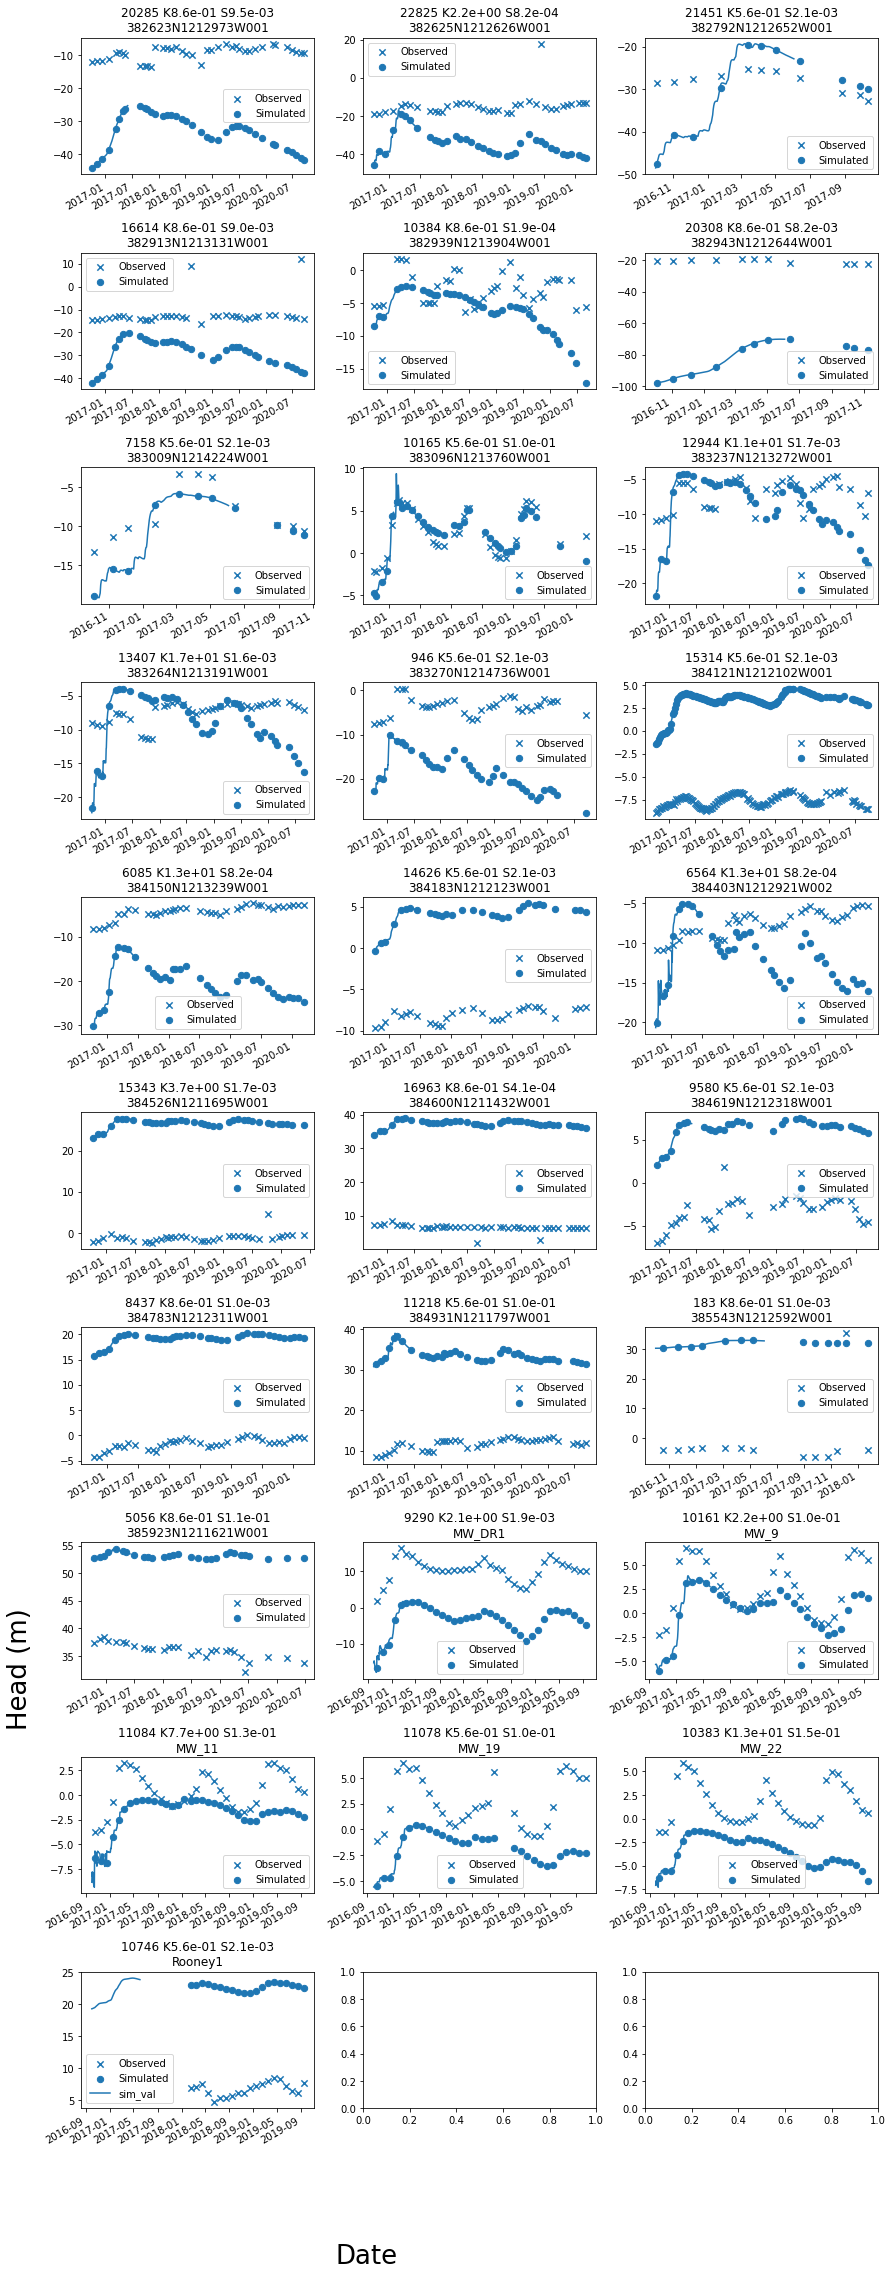

In [83]:
# voi = [4579, 11218, 15343,
#        14644, 14626, 11845,
#        12511, 8594,10884,
#        14789, 16614, 22825, 
#       11078, 14972, 19794]
voi = hob_gpd[hob_gpd.SITE_CODE.isin(hobs_long)].node.unique()
# voi = 22825
# def obs_sim_node(voi):
ny = 3
nx = int(np.ceil(len(voi)/ny))
fig,ax=plt.subplots(nx,ny,figsize=(12,3*nx))
for i,voi_n in enumerate(voi):
    ax_n = ax[int(i / ny), i % ny] if (nx > 1) else ax[i]
    hob_n = hob_gpd[hob_gpd.node==voi_n]
    hob_n.reset_index().plot(x='MSMT_DATE',y='WSE',kind='scatter', ax=ax_n,
                                                  marker='x', s=40, label = 'Observed')
    hob_n.reset_index().plot(x='MSMT_DATE',y='sim_val',kind='scatter', ax=ax_n, 
                                                  marker='o', s=40,label='Simulated')
    # add time series of simulated data to see true peaks
    ts_i = pd.DataFrame(hdobj.get_ts(hob_kij[hob_kij.node==voi_n].kij.values[0]),columns=['spd','sim_val']) 
    ts_i['dt'] = dt_ref.dt
    ts_i.plot(x='dt',y='sim_val', ax=ax_n, legend=False)

    ax_n.set_xlabel('')
    ax_n.set_ylabel('')
    S_n = format(storativity[hob_n.layer.iloc[0],hob_n.row.iloc[0],hob_n.column.iloc[0]],'.1e')
    K_n = format(m.lpf.hk.array[hob_n.layer.iloc[0],hob_n.row.iloc[0],hob_n.column.iloc[0]], '.1e')

    ax_n.set_title(str(voi_n)+' K'+K_n+' S'+S_n+'\n'+hob_n.SITE_CODE.iloc[0])
ax_n.legend()
fig.text(-0.03, 0.2, 'Head (m)',rotation='vertical',size=26)
fig.text(0.35, -0.05, 'Date',size=26)
fig.tight_layout()

# obs_sim_node(voi)
# hob_gpd[hob_gpd.node==22825].plot(x='MSMT_DATE',y='WSE',kind='scatter')


In [19]:
# hob_seasonal.loc[hob_seasonal.season=='spring'].plot('error',markersize='abs_error',scheme='Quantiles', k = 6,
#                   legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.8),'title':'Error (Obs - Sim)'})
# hob_seasonal.loc[hob_seasonal.season=='fall'].plot('error',markersize='abs_error',scheme='Quantiles', k = 6,
#                   legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.8),'title':'Error (Obs - Sim)'})

ValueError: Maximum allowed size exceeded

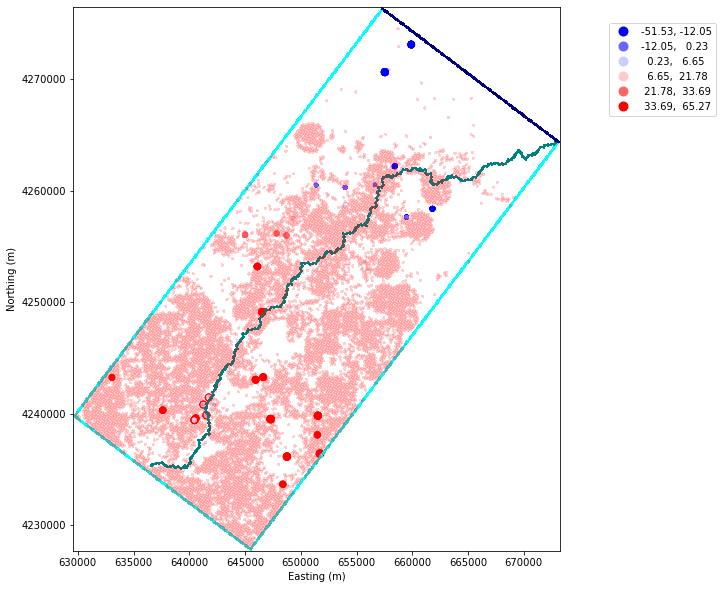

In [65]:
fig,ax = plt.subplots(figsize=(10, 10))
# plot_head(hdobj,cbb, spd_stp[180], 'Steady State',hk=False)

hob_gpd.plot('error',markersize='abs_error',scheme='Quantiles', k = 6, ax=ax,
                  legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.8)})

plt_bc_hk(m, ax, hk=False)
# plot_head_simple(m, hdobj, cbc, spd_stp[0], 'steady state', 'MF',ax=ax,units='m')
plot_dtw_simple(m, hdobj, cbc, spd_stp[0], 'steady state', 'MF',ax=ax,units='m')


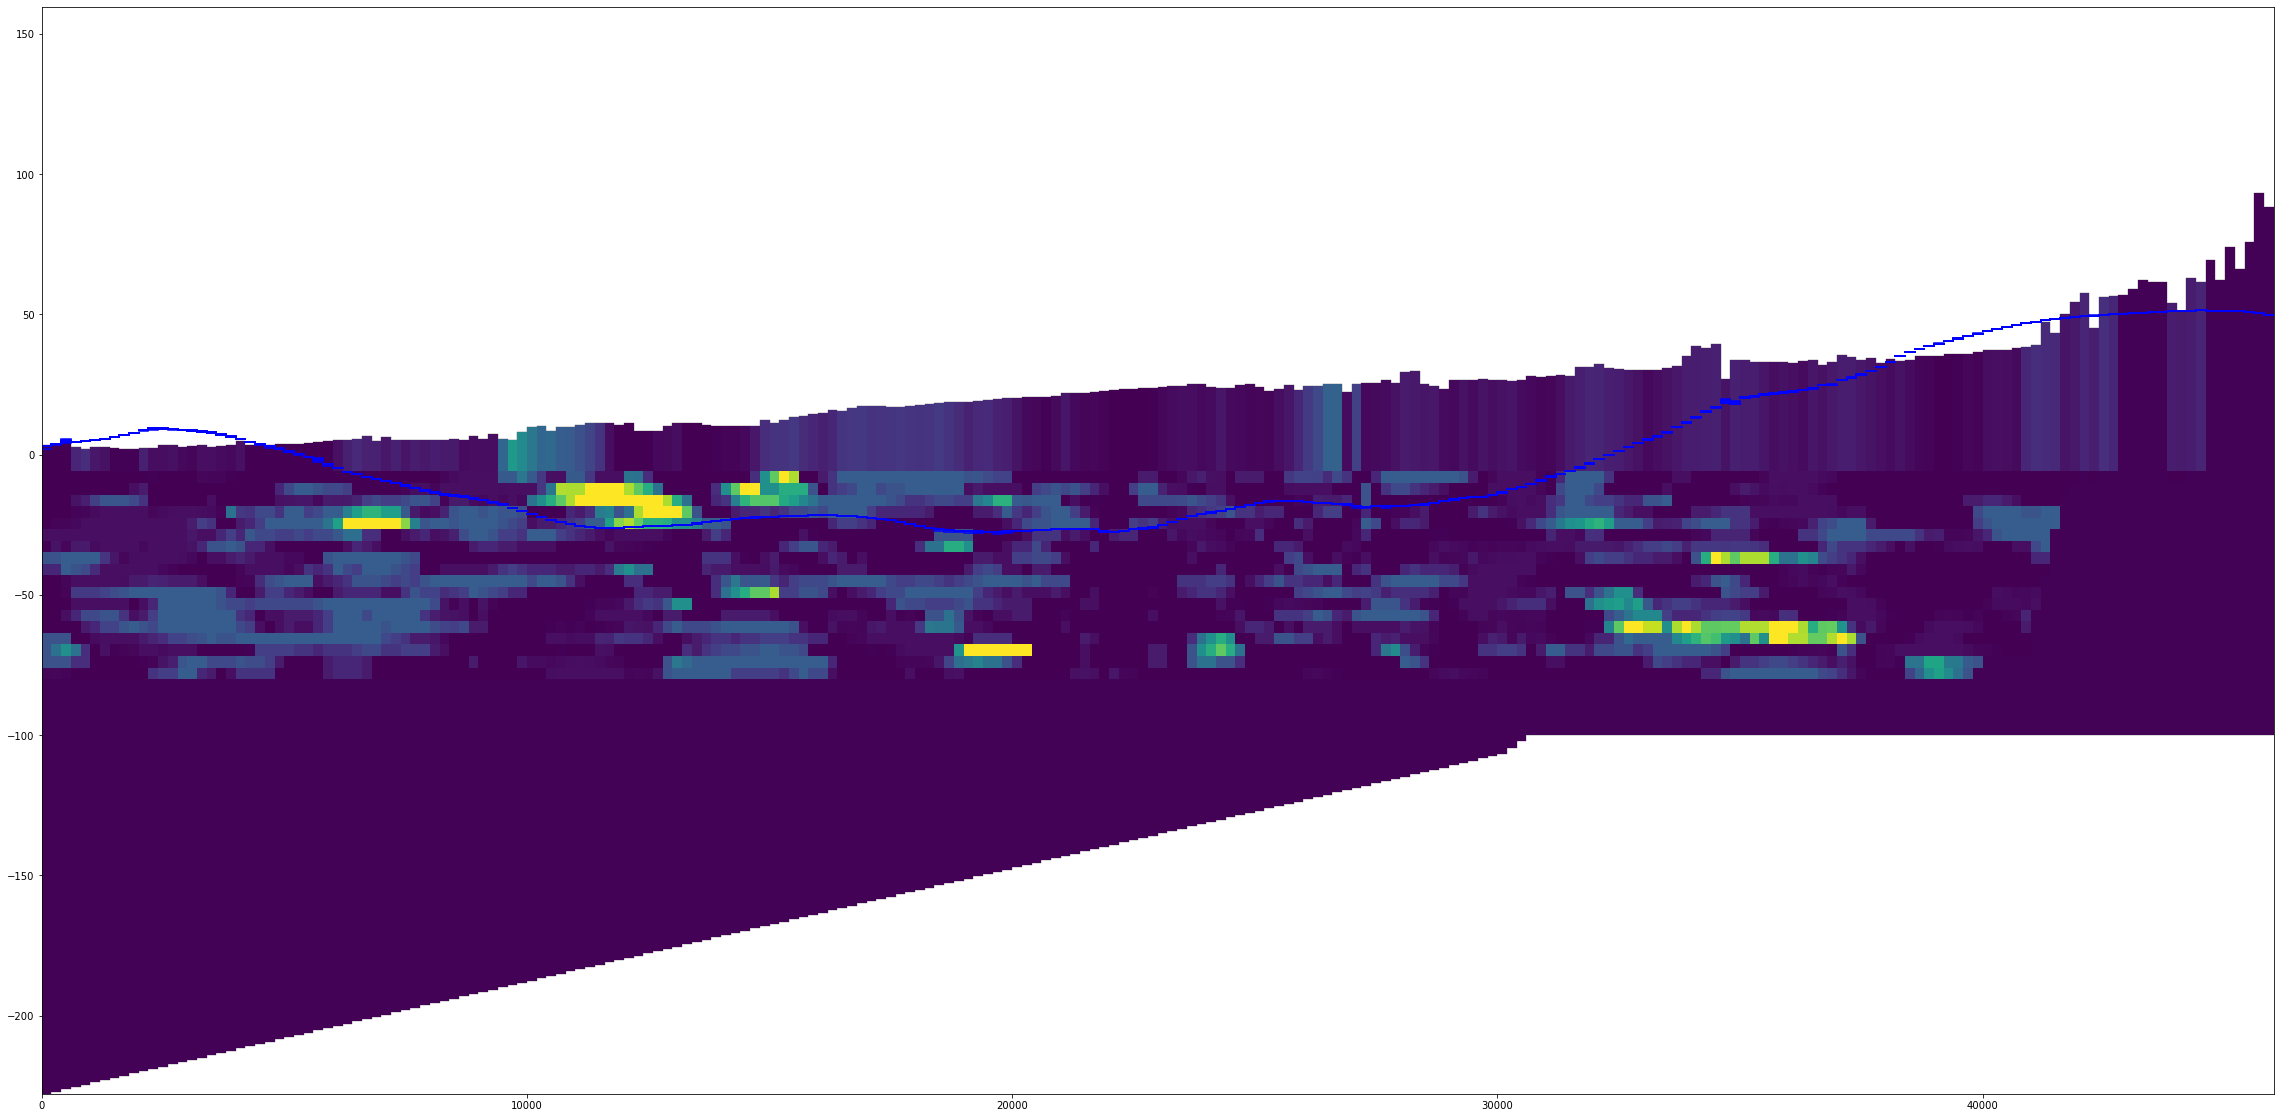

In [81]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1, 1, 1)

head = hdobj.get_data(kstpkper = spd_stp[0]) #spd_stp[0]
head.shape
# head[:,rownum,:].shape

rownum = 50
mcs = flopy.plot.PlotCrossSection(model=m, line={'Row' : rownum})

# colnum = 150
# mcs = flopy.plot.PlotCrossSection(model=m, line={'Column' : colnum})

linecollection = mcs.plot_grid(linewidth = 0.3)
ax.add_collection(linecollection)
# mcs.contour_array(a=head)
mcs.plot_array(a=m.lpf.hk.array)

wt = mcs.plot_surface(a=head[:,:,:])
